In [1]:
# 🔹 Step 1: Code block
# Install dependencies (if not pre-installed)
!pip install tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support
from tqdm import tqdm
import os

In [2]:
# 🔹 Step 2: Code block


# Mount Google Drive (optional, if dataset is stored there)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 🔹 Step 3: Code block
file_path = '/content/drive/My Drive/creditcard.csv'


In [4]:
# 🔹 Step 4: Code block


df = pd.read_csv(file_path)  # or read_excel, read_json, etc. depending on your file


In [5]:
# 🔹 Step 5: Code block
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
# 🔹 Step 6: Code block
df['Amount'] = np.log1p(df['Amount'])
normal = df[df['Class'] == 0].drop('Class', axis=1)
fraud = df[df['Class'] == 1].drop('Class', axis=1)
scaler = StandardScaler()
normal_scaled = scaler.fit_transform(normal)
fraud_scaled = scaler.transform(fraud)

In [7]:
# 🔹 Step 7: Code block
train_normal, test_normal = train_test_split(normal_scaled, test_size=0.2, random_state=42)
train_fraud, test_fraud = train_test_split(fraud_scaled, test_size=0.2, random_state=42)
train_data = np.concatenate([train_normal, train_fraud])
train_labels = np.concatenate([np.zeros(len(train_normal)), np.ones(len(train_fraud))])
test_data = np.concatenate([test_normal, test_fraud])
test_labels = np.concatenate([np.zeros(len(test_normal)), np.ones(len(test_fraud))])

In [8]:
# 🔹 Step 8: Code block
train_data, test_normal = train_test_split(normal_scaled, test_size=0.2, random_state=42)
test_fraud = scaler.transform(fraud)
test_data = np.concatenate([test_normal, test_fraud])
test_labels = np.concatenate([np.zeros(len(test_normal)), np.ones(len(test_fraud))])

In [9]:
# 🔹 Step 9: Code block
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [10]:
# 🔹 Step 10: Code block
train_tensor = torch.FloatTensor(train_data).to(device)
train_dataset = TensorDataset(train_tensor, train_tensor)  # Autoencoder: input = target
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)  # Define train_loader
test_tensor = torch.FloatTensor(test_data).to(device)

In [11]:
# 🔹 Step 11: Code block
class Autoencoder(nn.Module):
    def __init__(self, input_dim=30, latent_dim=10):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 20), nn.ReLU(),
            nn.Linear(20, latent_dim), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 20), nn.ReLU(),
            nn.Linear(20, input_dim)
        )

    def forward(self, x):
        latent = self.encoder(x)
        return self.decoder(latent)

In [12]:
# 🔹 Step 12: Code block
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
# 🔹 Step 13: Code block
model.train()
for epoch in range(50):
    total_loss = 0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/50'):
        inputs = batch[0].to(device)
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.6f}')

Epoch 1/50: 100%|██████████| 889/889 [00:03<00:00, 228.72it/s]


Epoch 1, Loss: 0.686477


Epoch 2/50: 100%|██████████| 889/889 [00:03<00:00, 235.28it/s]


Epoch 2, Loss: 0.541337


Epoch 3/50: 100%|██████████| 889/889 [00:03<00:00, 292.08it/s]


Epoch 3, Loss: 0.511202


Epoch 4/50: 100%|██████████| 889/889 [00:03<00:00, 279.18it/s]


Epoch 4, Loss: 0.482865


Epoch 5/50: 100%|██████████| 889/889 [00:03<00:00, 264.71it/s]


Epoch 5, Loss: 0.465536


Epoch 6/50: 100%|██████████| 889/889 [00:03<00:00, 238.16it/s]


Epoch 6, Loss: 0.445230


Epoch 7/50: 100%|██████████| 889/889 [00:03<00:00, 294.15it/s]


Epoch 7, Loss: 0.421494


Epoch 8/50: 100%|██████████| 889/889 [00:03<00:00, 281.30it/s]


Epoch 8, Loss: 0.412595


Epoch 9/50: 100%|██████████| 889/889 [00:03<00:00, 254.21it/s]


Epoch 9, Loss: 0.408840


Epoch 10/50: 100%|██████████| 889/889 [00:03<00:00, 243.32it/s]


Epoch 10, Loss: 0.406321


Epoch 11/50: 100%|██████████| 889/889 [00:03<00:00, 292.47it/s]


Epoch 11, Loss: 0.404267


Epoch 12/50: 100%|██████████| 889/889 [00:03<00:00, 279.52it/s]


Epoch 12, Loss: 0.402481


Epoch 13/50: 100%|██████████| 889/889 [00:03<00:00, 247.61it/s]


Epoch 13, Loss: 0.401540


Epoch 14/50: 100%|██████████| 889/889 [00:03<00:00, 251.13it/s]


Epoch 14, Loss: 0.399788


Epoch 15/50: 100%|██████████| 889/889 [00:03<00:00, 275.83it/s]


Epoch 15, Loss: 0.398884


Epoch 16/50: 100%|██████████| 889/889 [00:03<00:00, 291.71it/s]


Epoch 16, Loss: 0.397437


Epoch 17/50: 100%|██████████| 889/889 [00:03<00:00, 230.35it/s]


Epoch 17, Loss: 0.396277


Epoch 18/50: 100%|██████████| 889/889 [00:03<00:00, 282.56it/s]


Epoch 18, Loss: 0.395248


Epoch 19/50: 100%|██████████| 889/889 [00:03<00:00, 275.54it/s]


Epoch 19, Loss: 0.394631


Epoch 20/50: 100%|██████████| 889/889 [00:03<00:00, 293.15it/s]


Epoch 20, Loss: 0.393629


Epoch 21/50: 100%|██████████| 889/889 [00:04<00:00, 217.88it/s]


Epoch 21, Loss: 0.393057


Epoch 22/50: 100%|██████████| 889/889 [00:03<00:00, 289.62it/s]


Epoch 22, Loss: 0.392803


Epoch 23/50: 100%|██████████| 889/889 [00:03<00:00, 277.89it/s]


Epoch 23, Loss: 0.392111


Epoch 24/50: 100%|██████████| 889/889 [00:03<00:00, 291.57it/s]


Epoch 24, Loss: 0.391731


Epoch 25/50: 100%|██████████| 889/889 [00:04<00:00, 218.32it/s]


Epoch 25, Loss: 0.391453


Epoch 26/50: 100%|██████████| 889/889 [00:03<00:00, 293.19it/s]


Epoch 26, Loss: 0.391235


Epoch 27/50: 100%|██████████| 889/889 [00:03<00:00, 276.28it/s]


Epoch 27, Loss: 0.392567


Epoch 28/50: 100%|██████████| 889/889 [00:03<00:00, 289.00it/s]


Epoch 28, Loss: 0.390562


Epoch 29/50: 100%|██████████| 889/889 [00:04<00:00, 218.54it/s]


Epoch 29, Loss: 0.390487


Epoch 30/50: 100%|██████████| 889/889 [00:03<00:00, 289.71it/s]


Epoch 30, Loss: 0.390079


Epoch 31/50: 100%|██████████| 889/889 [00:03<00:00, 276.55it/s]


Epoch 31, Loss: 0.390030


Epoch 32/50: 100%|██████████| 889/889 [00:03<00:00, 269.10it/s]


Epoch 32, Loss: 0.389799


Epoch 33/50: 100%|██████████| 889/889 [00:03<00:00, 234.98it/s]


Epoch 33, Loss: 0.389415


Epoch 34/50: 100%|██████████| 889/889 [00:03<00:00, 280.60it/s]


Epoch 34, Loss: 0.389200


Epoch 35/50: 100%|██████████| 889/889 [00:03<00:00, 292.61it/s]


Epoch 35, Loss: 0.388300


Epoch 36/50: 100%|██████████| 889/889 [00:03<00:00, 261.94it/s]


Epoch 36, Loss: 0.387104


Epoch 37/50: 100%|██████████| 889/889 [00:03<00:00, 234.46it/s]


Epoch 37, Loss: 0.384512


Epoch 38/50: 100%|██████████| 889/889 [00:03<00:00, 280.19it/s]


Epoch 38, Loss: 0.382162


Epoch 39/50: 100%|██████████| 889/889 [00:03<00:00, 294.60it/s]


Epoch 39, Loss: 0.380915


Epoch 40/50: 100%|██████████| 889/889 [00:03<00:00, 260.46it/s]


Epoch 40, Loss: 0.379688


Epoch 41/50: 100%|██████████| 889/889 [00:03<00:00, 244.08it/s]


Epoch 41, Loss: 0.378671


Epoch 42/50: 100%|██████████| 889/889 [00:03<00:00, 279.37it/s]


Epoch 42, Loss: 0.377783


Epoch 43/50: 100%|██████████| 889/889 [00:03<00:00, 295.36it/s]


Epoch 43, Loss: 0.376912


Epoch 44/50: 100%|██████████| 889/889 [00:03<00:00, 252.12it/s]


Epoch 44, Loss: 0.375933


Epoch 45/50: 100%|██████████| 889/889 [00:03<00:00, 247.68it/s]


Epoch 45, Loss: 0.375191


Epoch 46/50: 100%|██████████| 889/889 [00:03<00:00, 275.39it/s]


Epoch 46, Loss: 0.374608


Epoch 47/50: 100%|██████████| 889/889 [00:03<00:00, 280.99it/s]


Epoch 47, Loss: 0.373977


Epoch 48/50: 100%|██████████| 889/889 [00:03<00:00, 261.37it/s]


Epoch 48, Loss: 0.373549


Epoch 49/50: 100%|██████████| 889/889 [00:03<00:00, 243.00it/s]


Epoch 49, Loss: 0.373410


Epoch 50/50: 100%|██████████| 889/889 [00:03<00:00, 296.32it/s]

Epoch 50, Loss: 0.372632


In [14]:
# 🔹 Step 14: Code block
torch.save(model.state_dict(), '/content/drive/MyDrive/autoencoder_fraud.pth')

In [15]:
# 🔹 Step 15: Code block
model.eval()
with torch.no_grad():
    recon = model(test_tensor)
    recon_error = torch.mean((recon - test_tensor) ** 2, dim=1).cpu().numpy()
threshold = np.quantile(recon_error[:len(test_normal)], 0.95)
predictions = (recon_error > threshold).astype(int)

In [16]:
# 🔹 Step 16: Code block
auc = roc_auc_score(test_labels, recon_error)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predictions, average='binary')
print(f'AUC-ROC: {auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}')

AUC-ROC: 0.9307, Precision: 0.1255, Recall: 0.8293, F1: 0.2179


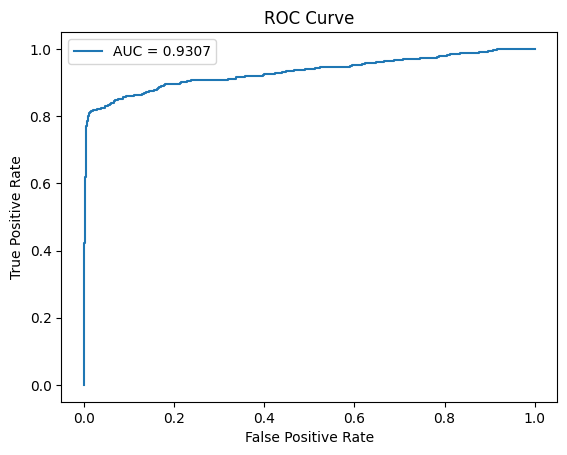

In [17]:
# 🔹 Step 17: Import libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(test_labels, recon_error)
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [18]:
# 🔹 Step 18: Code block
threshold = np.quantile(recon_error[:len(test_normal)], 0.99)  # Try 99th percentile
predictions = (recon_error > threshold).astype(int)
auc = roc_auc_score(test_labels, recon_error)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predictions, average='binary')
print(f'Threshold: 0.99, AUC-ROC: {auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}')

Threshold: 0.99, AUC-ROC: 0.9307, Precision: 0.4085, Recall: 0.7988, F1: 0.5406


In [19]:
# 🔹 Step 19: Code block
model.train()
losses = []
for epoch in range(50):
    total_loss = 0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/50'):
        inputs = batch[0].to(device)
        inputs_noisy = inputs + torch.normal(0, 0.1, size=inputs.shape).to(device)
        outputs = model(inputs_noisy)
        loss = criterion(outputs, inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss:.6f}')

Epoch 1/50: 100%|██████████| 889/889 [00:03<00:00, 260.56it/s]


Epoch 1, Loss: 0.379955


Epoch 2/50: 100%|██████████| 889/889 [00:03<00:00, 279.30it/s]


Epoch 2, Loss: 0.378931


Epoch 3/50: 100%|██████████| 889/889 [00:04<00:00, 212.24it/s]


Epoch 3, Loss: 0.378409


Epoch 4/50: 100%|██████████| 889/889 [00:03<00:00, 282.08it/s]


Epoch 4, Loss: 0.378073


Epoch 5/50: 100%|██████████| 889/889 [00:03<00:00, 264.52it/s]


Epoch 5, Loss: 0.377940


Epoch 6/50: 100%|██████████| 889/889 [00:03<00:00, 281.27it/s]


Epoch 6, Loss: 0.377839


Epoch 7/50: 100%|██████████| 889/889 [00:04<00:00, 211.93it/s]


Epoch 7, Loss: 0.377470


Epoch 8/50: 100%|██████████| 889/889 [00:03<00:00, 278.26it/s]


Epoch 8, Loss: 0.377065


Epoch 9/50: 100%|██████████| 889/889 [00:03<00:00, 266.93it/s]


Epoch 9, Loss: 0.377228


Epoch 10/50: 100%|██████████| 889/889 [00:03<00:00, 256.29it/s]


Epoch 10, Loss: 0.376975


Epoch 11/50: 100%|██████████| 889/889 [00:03<00:00, 229.15it/s]


Epoch 11, Loss: 0.376463


Epoch 12/50: 100%|██████████| 889/889 [00:03<00:00, 267.39it/s]


Epoch 12, Loss: 0.376490


Epoch 13/50: 100%|██████████| 889/889 [00:03<00:00, 281.86it/s]


Epoch 13, Loss: 0.375997


Epoch 14/50: 100%|██████████| 889/889 [00:03<00:00, 224.67it/s]


Epoch 14, Loss: 0.375949


Epoch 15/50: 100%|██████████| 889/889 [00:03<00:00, 261.69it/s]


Epoch 15, Loss: 0.375698


Epoch 16/50: 100%|██████████| 889/889 [00:03<00:00, 263.62it/s]


Epoch 16, Loss: 0.375376


Epoch 17/50: 100%|██████████| 889/889 [00:03<00:00, 279.04it/s]


Epoch 17, Loss: 0.375106


Epoch 18/50: 100%|██████████| 889/889 [00:04<00:00, 210.52it/s]


Epoch 18, Loss: 0.374640


Epoch 19/50: 100%|██████████| 889/889 [00:03<00:00, 280.98it/s]


Epoch 19, Loss: 0.374423


Epoch 20/50: 100%|██████████| 889/889 [00:03<00:00, 267.52it/s]


Epoch 20, Loss: 0.373888


Epoch 21/50: 100%|██████████| 889/889 [00:03<00:00, 274.77it/s]


Epoch 21, Loss: 0.373287


Epoch 22/50: 100%|██████████| 889/889 [00:04<00:00, 214.49it/s]


Epoch 22, Loss: 0.372529


Epoch 23/50: 100%|██████████| 889/889 [00:03<00:00, 278.96it/s]


Epoch 23, Loss: 0.371985


Epoch 24/50: 100%|██████████| 889/889 [00:03<00:00, 265.78it/s]


Epoch 24, Loss: 0.370740


Epoch 25/50: 100%|██████████| 889/889 [00:03<00:00, 249.21it/s]


Epoch 25, Loss: 0.369884


Epoch 26/50: 100%|██████████| 889/889 [00:03<00:00, 231.97it/s]


Epoch 26, Loss: 0.369219


Epoch 27/50: 100%|██████████| 889/889 [00:03<00:00, 278.76it/s]


Epoch 27, Loss: 0.368512


Epoch 28/50: 100%|██████████| 889/889 [00:03<00:00, 265.51it/s]


Epoch 28, Loss: 0.368015


Epoch 29/50: 100%|██████████| 889/889 [00:04<00:00, 219.74it/s]


Epoch 29, Loss: 0.367629


Epoch 30/50: 100%|██████████| 889/889 [00:03<00:00, 267.17it/s]


Epoch 30, Loss: 0.367171


Epoch 31/50: 100%|██████████| 889/889 [00:03<00:00, 266.64it/s]


Epoch 31, Loss: 0.366630


Epoch 32/50: 100%|██████████| 889/889 [00:03<00:00, 279.53it/s]


Epoch 32, Loss: 0.366300


Epoch 33/50: 100%|██████████| 889/889 [00:04<00:00, 210.65it/s]


Epoch 33, Loss: 0.366177


Epoch 34/50: 100%|██████████| 889/889 [00:03<00:00, 274.09it/s]


Epoch 34, Loss: 0.365951


Epoch 35/50: 100%|██████████| 889/889 [00:03<00:00, 261.23it/s]


Epoch 35, Loss: 0.365416


Epoch 36/50: 100%|██████████| 889/889 [00:03<00:00, 259.00it/s]


Epoch 36, Loss: 0.365394


Epoch 37/50: 100%|██████████| 889/889 [00:03<00:00, 222.45it/s]


Epoch 37, Loss: 0.365371


Epoch 38/50: 100%|██████████| 889/889 [00:03<00:00, 280.04it/s]


Epoch 38, Loss: 0.364805


Epoch 39/50: 100%|██████████| 889/889 [00:03<00:00, 265.42it/s]


Epoch 39, Loss: 0.364652


Epoch 40/50: 100%|██████████| 889/889 [00:03<00:00, 243.27it/s]


Epoch 40, Loss: 0.364439


Epoch 41/50: 100%|██████████| 889/889 [00:03<00:00, 242.11it/s]


Epoch 41, Loss: 0.364233


Epoch 42/50: 100%|██████████| 889/889 [00:03<00:00, 275.80it/s]


Epoch 42, Loss: 0.364012


Epoch 43/50: 100%|██████████| 889/889 [00:03<00:00, 266.86it/s]


Epoch 43, Loss: 0.363814


Epoch 44/50: 100%|██████████| 889/889 [00:04<00:00, 211.49it/s]


Epoch 44, Loss: 0.364034


Epoch 45/50: 100%|██████████| 889/889 [00:03<00:00, 277.87it/s]


Epoch 45, Loss: 0.363698


Epoch 46/50: 100%|██████████| 889/889 [00:03<00:00, 259.22it/s]


Epoch 46, Loss: 0.363375


Epoch 47/50: 100%|██████████| 889/889 [00:03<00:00, 279.43it/s]


Epoch 47, Loss: 0.363446


Epoch 48/50: 100%|██████████| 889/889 [00:04<00:00, 211.56it/s]


Epoch 48, Loss: 0.363330


Epoch 49/50: 100%|██████████| 889/889 [00:03<00:00, 277.36it/s]


Epoch 49, Loss: 0.363232


Epoch 50/50: 100%|██████████| 889/889 [00:03<00:00, 267.52it/s]

Epoch 50, Loss: 0.363005


In [20]:
# 🔹 Step 20: Code block
torch.save(model.state_dict(), '/content/drive/MyDrive/autoencoder_fraud.pth')

In [21]:
# 🔹 Step 21: Code block
model.eval()
with torch.no_grad():
    recon = model(test_tensor)
    recon_error = torch.mean((recon - test_tensor) ** 2, dim=1).cpu().numpy()

In [22]:
# 🔹 Step 22: Code block
thresholds = [0.95, 0.96, 0.97, 0.98, 0.99]
precisions, recalls, f1_scores = [], [], []
for quantile in thresholds:
    threshold = np.quantile(recon_error[:len(test_normal)], quantile)
    predictions = (recon_error > threshold).astype(int)
    auc = roc_auc_score(test_labels, recon_error)
    precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predictions, average='binary')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    print(f'Threshold: {quantile:.2f}, AUC-ROC: {auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}')

Threshold: 0.95, AUC-ROC: 0.9253, Precision: 0.1252, Recall: 0.8272, F1: 0.2175
Threshold: 0.96, AUC-ROC: 0.9253, Precision: 0.1514, Recall: 0.8252, F1: 0.2559
Threshold: 0.97, AUC-ROC: 0.9253, Precision: 0.1911, Recall: 0.8191, F1: 0.3099
Threshold: 0.98, AUC-ROC: 0.9253, Precision: 0.2610, Recall: 0.8171, F1: 0.3957
Threshold: 0.99, AUC-ROC: 0.9253, Precision: 0.4098, Recall: 0.8028, F1: 0.5426


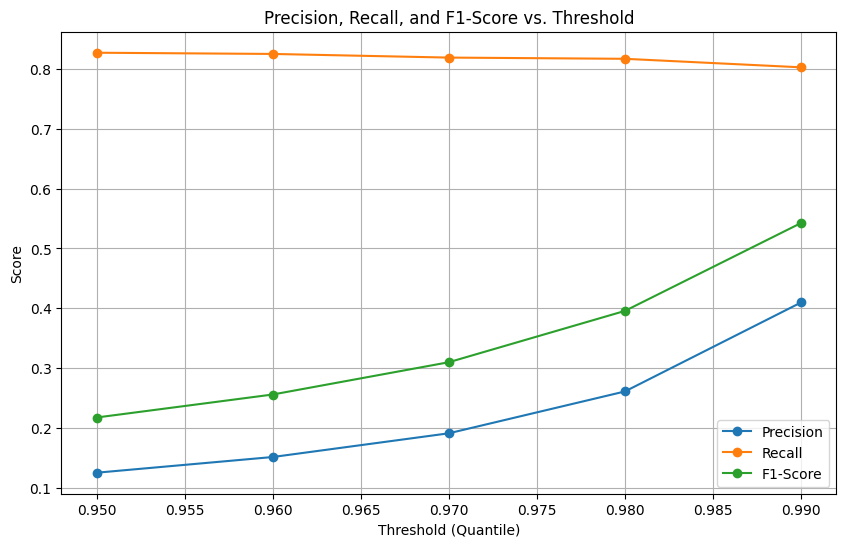

In [23]:
# 🔹 Step 23: Code block
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, marker='o', label='Precision')
plt.plot(thresholds, recalls, marker='o', label='Recall')
plt.plot(thresholds, f1_scores, marker='o', label='F1-Score')
plt.xlabel('Threshold (Quantile)')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

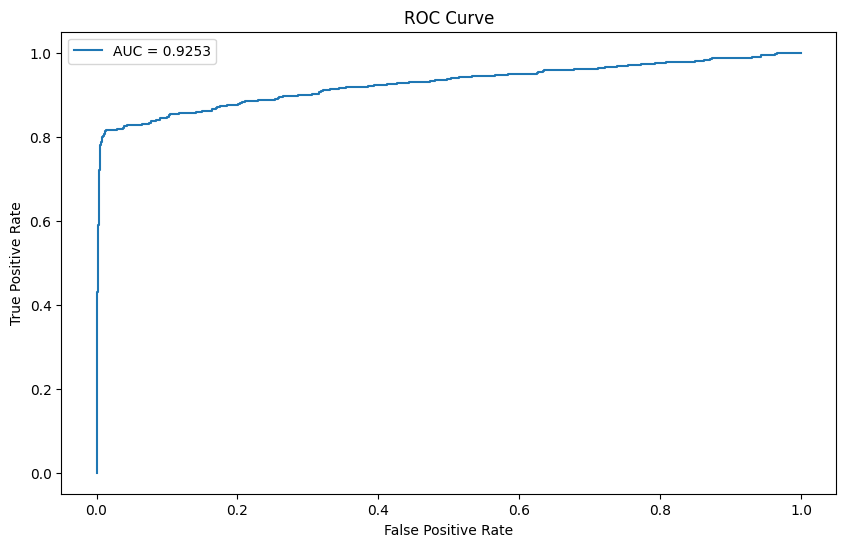

In [24]:
# 🔹 Step 24: Code block
fpr, tpr, _ = roc_curve(test_labels, recon_error)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

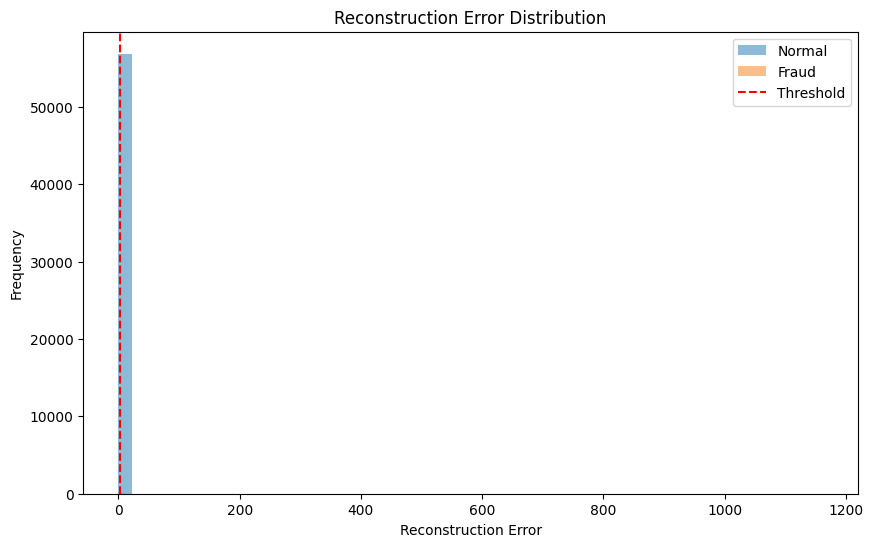

In [25]:
# 🔹 Step 25: Code block
plt.figure(figsize=(10, 6))
plt.hist(recon_error[:len(test_normal)], bins=50, alpha=0.5, label='Normal')
plt.hist(recon_error[len(test_normal):], bins=50, alpha=0.5, label='Fraud')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.show()

In [26]:
# 🔹 Step 26: Import libraries


from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve
from xgboost import XGBClassifier


In [27]:
# 🔹 Step 27: Code block
model_xgb = XGBClassifier(scale_pos_weight=len(normal)/len(fraud), max_depth=4, learning_rate=0.05, random_state=42)
model_xgb.fit(train_data, np.zeros(len(train_data)))
test_probs = model_xgb.predict_proba(test_data)[:, 1]
predictions_xgb = (test_probs > 0.5).astype(int)
auc_xgb = roc_auc_score(test_labels, test_probs)
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(test_labels, predictions_xgb, average='binary')
print(f'XGBoost - AUC-ROC: {auc_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1: {f1_xgb:.4f}')

XGBoost - AUC-ROC: 0.5000, Precision: 0.0000, Recall: 0.0000, F1: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
# 🔹 Step 28: Import libraries



import xgboost as xgb

In [29]:
# 🔹 Step 29: Code block
dtest = xgb.DMatrix(test_data, enable_categorical=False)

In [30]:
# 🔹 Step 30: Code block
class Autoencoder(nn.Module):
    def __init__(self, input_dim=30, latent_dim=16):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(32, 24), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(24, latent_dim), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 24), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(24, 32), nn.ReLU(),
            nn.Linear(32, input_dim)
        )

    def forward(self, x):
        latent = self.encoder(x)
        return self.decoder(latent)

In [31]:
# 🔹 Step 31: Code block
model_ae = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_ae.parameters(), lr=0.001)

model_ae.train()
losses = []
for epoch in range(50):
    total_loss = 0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/50'):
        inputs = batch[0].to(device)
        inputs_noisy = inputs + torch.normal(0, 0.2, size=inputs.shape).to(device)
        outputs = model_ae(inputs_noisy)
        loss = criterion(outputs, inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss:.6f}')

Epoch 1/50: 100%|██████████| 889/889 [00:04<00:00, 213.27it/s]


Epoch 1, Loss: 0.820369


Epoch 2/50: 100%|██████████| 889/889 [00:03<00:00, 225.08it/s]


Epoch 2, Loss: 0.700535


Epoch 3/50: 100%|██████████| 889/889 [00:04<00:00, 216.36it/s]


Epoch 3, Loss: 0.660869


Epoch 4/50: 100%|██████████| 889/889 [00:04<00:00, 195.63it/s]


Epoch 4, Loss: 0.642748


Epoch 5/50: 100%|██████████| 889/889 [00:03<00:00, 225.69it/s]


Epoch 5, Loss: 0.630302


Epoch 6/50: 100%|██████████| 889/889 [00:03<00:00, 227.85it/s]


Epoch 6, Loss: 0.619705


Epoch 7/50: 100%|██████████| 889/889 [00:04<00:00, 187.79it/s]


Epoch 7, Loss: 0.615423


Epoch 8/50: 100%|██████████| 889/889 [00:03<00:00, 235.44it/s]


Epoch 8, Loss: 0.610283


Epoch 9/50: 100%|██████████| 889/889 [00:03<00:00, 226.49it/s]


Epoch 9, Loss: 0.602250


Epoch 10/50: 100%|██████████| 889/889 [00:04<00:00, 187.26it/s]


Epoch 10, Loss: 0.597397


Epoch 11/50: 100%|██████████| 889/889 [00:04<00:00, 221.64it/s]


Epoch 11, Loss: 0.593336


Epoch 12/50: 100%|██████████| 889/889 [00:03<00:00, 231.98it/s]


Epoch 12, Loss: 0.590360


Epoch 13/50: 100%|██████████| 889/889 [00:04<00:00, 183.70it/s]


Epoch 13, Loss: 0.585665


Epoch 14/50: 100%|██████████| 889/889 [00:03<00:00, 236.00it/s]


Epoch 14, Loss: 0.579981


Epoch 15/50: 100%|██████████| 889/889 [00:03<00:00, 225.25it/s]


Epoch 15, Loss: 0.578176


Epoch 16/50: 100%|██████████| 889/889 [00:04<00:00, 189.99it/s]


Epoch 16, Loss: 0.574730


Epoch 17/50: 100%|██████████| 889/889 [00:03<00:00, 224.30it/s]


Epoch 17, Loss: 0.573410


Epoch 18/50: 100%|██████████| 889/889 [00:03<00:00, 235.85it/s]


Epoch 18, Loss: 0.569384


Epoch 19/50: 100%|██████████| 889/889 [00:04<00:00, 189.02it/s]


Epoch 19, Loss: 0.565365


Epoch 20/50: 100%|██████████| 889/889 [00:03<00:00, 229.97it/s]


Epoch 20, Loss: 0.563286


Epoch 21/50: 100%|██████████| 889/889 [00:03<00:00, 227.24it/s]


Epoch 21, Loss: 0.562415


Epoch 22/50: 100%|██████████| 889/889 [00:04<00:00, 209.83it/s]


Epoch 22, Loss: 0.559632


Epoch 23/50: 100%|██████████| 889/889 [00:04<00:00, 205.68it/s]


Epoch 23, Loss: 0.555035


Epoch 24/50: 100%|██████████| 889/889 [00:03<00:00, 225.70it/s]


Epoch 24, Loss: 0.551492


Epoch 25/50: 100%|██████████| 889/889 [00:04<00:00, 216.36it/s]


Epoch 25, Loss: 0.552419


Epoch 26/50: 100%|██████████| 889/889 [00:04<00:00, 196.45it/s]


Epoch 26, Loss: 0.549581


Epoch 27/50: 100%|██████████| 889/889 [00:03<00:00, 234.39it/s]


Epoch 27, Loss: 0.549040


Epoch 28/50: 100%|██████████| 889/889 [00:04<00:00, 218.16it/s]


Epoch 28, Loss: 0.544220


Epoch 29/50: 100%|██████████| 889/889 [00:04<00:00, 194.11it/s]


Epoch 29, Loss: 0.544230


Epoch 30/50: 100%|██████████| 889/889 [00:03<00:00, 228.63it/s]


Epoch 30, Loss: 0.541158


Epoch 31/50: 100%|██████████| 889/889 [00:03<00:00, 236.79it/s]


Epoch 31, Loss: 0.538612


Epoch 32/50: 100%|██████████| 889/889 [00:04<00:00, 183.42it/s]


Epoch 32, Loss: 0.539217


Epoch 33/50: 100%|██████████| 889/889 [00:03<00:00, 236.17it/s]


Epoch 33, Loss: 0.535424


Epoch 34/50: 100%|██████████| 889/889 [00:03<00:00, 225.14it/s]


Epoch 34, Loss: 0.535286


Epoch 35/50: 100%|██████████| 889/889 [00:04<00:00, 190.27it/s]


Epoch 35, Loss: 0.533172


Epoch 36/50: 100%|██████████| 889/889 [00:03<00:00, 225.66it/s]


Epoch 36, Loss: 0.532695


Epoch 37/50: 100%|██████████| 889/889 [00:03<00:00, 236.01it/s]


Epoch 37, Loss: 0.529820


Epoch 38/50: 100%|██████████| 889/889 [00:04<00:00, 183.80it/s]


Epoch 38, Loss: 0.528455


Epoch 39/50: 100%|██████████| 889/889 [00:03<00:00, 231.27it/s]


Epoch 39, Loss: 0.526462


Epoch 40/50: 100%|██████████| 889/889 [00:03<00:00, 222.34it/s]


Epoch 40, Loss: 0.527037


Epoch 41/50: 100%|██████████| 889/889 [00:04<00:00, 192.65it/s]


Epoch 41, Loss: 0.524294


Epoch 42/50: 100%|██████████| 889/889 [00:03<00:00, 223.57it/s]


Epoch 42, Loss: 0.521624


Epoch 43/50: 100%|██████████| 889/889 [00:04<00:00, 219.66it/s]


Epoch 43, Loss: 0.527687


Epoch 44/50: 100%|██████████| 889/889 [00:04<00:00, 202.83it/s]


Epoch 44, Loss: 0.522755


Epoch 45/50: 100%|██████████| 889/889 [00:04<00:00, 204.07it/s]


Epoch 45, Loss: 0.520561


Epoch 46/50: 100%|██████████| 889/889 [00:03<00:00, 232.66it/s]


Epoch 46, Loss: 0.521521


Epoch 47/50: 100%|██████████| 889/889 [00:04<00:00, 205.10it/s]


Epoch 47, Loss: 0.517723


Epoch 48/50: 100%|██████████| 889/889 [00:04<00:00, 204.99it/s]


Epoch 48, Loss: 0.521322


Epoch 49/50: 100%|██████████| 889/889 [00:03<00:00, 226.76it/s]


Epoch 49, Loss: 0.518357


Epoch 50/50: 100%|██████████| 889/889 [00:03<00:00, 226.58it/s]

Epoch 50, Loss: 0.518350


In [32]:
# 🔹 Step 32: Code block
torch.save(model_ae.state_dict(), '/content/drive/MyDrive/autoencoder_fraud.pth')

In [33]:
# 🔹 Step 33: Code block
model_ae.eval()
with torch.no_grad():
    recon = model_ae(test_tensor)
    recon_error = torch.mean((recon - test_tensor) ** 2, dim=1).cpu().numpy()

In [34]:
# 🔹 Step 34: Code block
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [35]:
# 🔹 Step 35: Code block
train_normal, test_normal = train_test_split(normal_scaled, test_size=0.2, random_state=42)
train_fraud, test_fraud = train_test_split(fraud_scaled, test_size=0.2, random_state=42)
train_data = np.concatenate([train_normal, train_fraud])
train_labels = np.concatenate([np.zeros(len(train_normal)), np.ones(len(train_fraud))])
test_data = np.concatenate([test_normal, test_fraud])
test_labels = np.concatenate([np.zeros(len(test_normal)), np.ones(len(test_fraud))])

In [36]:
# 🔹 Step 36: Code block
print(f"Train data shape: {train_data.shape}, Train labels shape: {train_labels.shape}")
print(f"Test data shape: {test_data.shape}, Test labels shape: {test_labels.shape}")

# Create DataLoader for Autoencoder

Train data shape: (227845, 30), Train labels shape: (227845,)
Test data shape: (56962, 30), Test labels shape: (56962,)


In [37]:
# 🔹 Step 37: Code block
train_tensor = torch.FloatTensor(train_normal).to(device)  # Only normal data for autoencoder
train_dataset = TensorDataset(train_tensor, train_tensor)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_tensor = torch.FloatTensor(test_data).to(device)

In [38]:
# 🔹 Step 38: Code block
dtest = xgb.DMatrix(test_data, enable_categorical=False)

In [39]:
# 🔹 Step 39: Code block
class Autoencoder(nn.Module):
    def __init__(self, input_dim=30, latent_dim=16):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(32, 24), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(24, latent_dim), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 24), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(24, 32), nn.ReLU(),
            nn.Linear(32, input_dim)
        )

    def forward(self, x):
        latent = self.encoder(x)
        return self.decoder(latent)

In [40]:
# 🔹 Step 40: Code block
model_ae = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_ae.parameters(), lr=0.001)

In [41]:
# 🔹 Step 41: Code block
model_ae.train()
losses = []
for epoch in range(50):
    total_loss = 0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/50'):
        inputs = batch[0].to(device)
        inputs_noisy = inputs + torch.normal(0, 0.2, size=inputs.shape).to(device)
        outputs = model_ae(inputs_noisy)
        loss = criterion(outputs, inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss:.6f}')

Epoch 1/50: 100%|██████████| 889/889 [00:04<00:00, 221.46it/s]


Epoch 1, Loss: 0.819237


Epoch 2/50: 100%|██████████| 889/889 [00:03<00:00, 234.70it/s]


Epoch 2, Loss: 0.695486


Epoch 3/50: 100%|██████████| 889/889 [00:05<00:00, 168.96it/s]


Epoch 3, Loss: 0.665127


Epoch 4/50: 100%|██████████| 889/889 [00:07<00:00, 125.79it/s]


Epoch 4, Loss: 0.650139


Epoch 5/50: 100%|██████████| 889/889 [00:04<00:00, 192.10it/s]


Epoch 5, Loss: 0.639008


Epoch 6/50: 100%|██████████| 889/889 [00:04<00:00, 217.90it/s]


Epoch 6, Loss: 0.630242


Epoch 7/50: 100%|██████████| 889/889 [00:03<00:00, 222.30it/s]


Epoch 7, Loss: 0.622388


Epoch 8/50: 100%|██████████| 889/889 [00:04<00:00, 209.83it/s]


Epoch 8, Loss: 0.613912


Epoch 9/50: 100%|██████████| 889/889 [00:04<00:00, 201.81it/s]


Epoch 9, Loss: 0.606779


Epoch 10/50: 100%|██████████| 889/889 [00:03<00:00, 225.44it/s]


Epoch 10, Loss: 0.601081


Epoch 11/50: 100%|██████████| 889/889 [00:04<00:00, 221.88it/s]


Epoch 11, Loss: 0.597957


Epoch 12/50: 100%|██████████| 889/889 [00:04<00:00, 193.46it/s]


Epoch 12, Loss: 0.595895


Epoch 13/50: 100%|██████████| 889/889 [00:03<00:00, 232.15it/s]


Epoch 13, Loss: 0.591229


Epoch 14/50: 100%|██████████| 889/889 [00:04<00:00, 222.16it/s]


Epoch 14, Loss: 0.588782


Epoch 15/50: 100%|██████████| 889/889 [00:04<00:00, 193.80it/s]


Epoch 15, Loss: 0.586858


Epoch 16/50: 100%|██████████| 889/889 [00:03<00:00, 225.03it/s]


Epoch 16, Loss: 0.582117


Epoch 17/50: 100%|██████████| 889/889 [00:03<00:00, 232.97it/s]


Epoch 17, Loss: 0.581790


Epoch 18/50: 100%|██████████| 889/889 [00:04<00:00, 185.10it/s]


Epoch 18, Loss: 0.577297


Epoch 19/50: 100%|██████████| 889/889 [00:03<00:00, 232.89it/s]


Epoch 19, Loss: 0.576628


Epoch 20/50: 100%|██████████| 889/889 [00:03<00:00, 222.89it/s]


Epoch 20, Loss: 0.570900


Epoch 21/50: 100%|██████████| 889/889 [00:04<00:00, 187.63it/s]


Epoch 21, Loss: 0.567611


Epoch 22/50: 100%|██████████| 889/889 [00:03<00:00, 225.05it/s]


Epoch 22, Loss: 0.565479


Epoch 23/50: 100%|██████████| 889/889 [00:03<00:00, 234.35it/s]


Epoch 23, Loss: 0.564179


Epoch 24/50: 100%|██████████| 889/889 [00:04<00:00, 184.26it/s]


Epoch 24, Loss: 0.561528


Epoch 25/50: 100%|██████████| 889/889 [00:03<00:00, 233.50it/s]


Epoch 25, Loss: 0.554470


Epoch 26/50: 100%|██████████| 889/889 [00:03<00:00, 223.86it/s]


Epoch 26, Loss: 0.554586


Epoch 27/50: 100%|██████████| 889/889 [00:04<00:00, 189.99it/s]


Epoch 27, Loss: 0.549657


Epoch 28/50: 100%|██████████| 889/889 [00:03<00:00, 223.66it/s]


Epoch 28, Loss: 0.544683


Epoch 29/50: 100%|██████████| 889/889 [00:03<00:00, 224.29it/s]


Epoch 29, Loss: 0.547643


Epoch 30/50: 100%|██████████| 889/889 [00:04<00:00, 208.45it/s]


Epoch 30, Loss: 0.543951


Epoch 31/50: 100%|██████████| 889/889 [00:04<00:00, 202.98it/s]


Epoch 31, Loss: 0.542760


Epoch 32/50: 100%|██████████| 889/889 [00:03<00:00, 234.31it/s]


Epoch 32, Loss: 0.538215


Epoch 33/50: 100%|██████████| 889/889 [00:04<00:00, 209.94it/s]


Epoch 33, Loss: 0.538186


Epoch 34/50: 100%|██████████| 889/889 [00:04<00:00, 203.48it/s]


Epoch 34, Loss: 0.536773


Epoch 35/50: 100%|██████████| 889/889 [00:03<00:00, 224.43it/s]


Epoch 35, Loss: 0.534201


Epoch 36/50: 100%|██████████| 889/889 [00:03<00:00, 229.66it/s]


Epoch 36, Loss: 0.529827


Epoch 37/50: 100%|██████████| 889/889 [00:04<00:00, 188.04it/s]


Epoch 37, Loss: 0.532406


Epoch 38/50: 100%|██████████| 889/889 [00:03<00:00, 234.63it/s]


Epoch 38, Loss: 0.528239


Epoch 39/50: 100%|██████████| 889/889 [00:03<00:00, 225.27it/s]


Epoch 39, Loss: 0.525994


Epoch 40/50: 100%|██████████| 889/889 [00:04<00:00, 191.38it/s]


Epoch 40, Loss: 0.524437


Epoch 41/50: 100%|██████████| 889/889 [00:03<00:00, 226.35it/s]


Epoch 41, Loss: 0.526472


Epoch 42/50: 100%|██████████| 889/889 [00:03<00:00, 230.81it/s]


Epoch 42, Loss: 0.521994


Epoch 43/50: 100%|██████████| 889/889 [00:04<00:00, 181.63it/s]


Epoch 43, Loss: 0.521408


Epoch 44/50: 100%|██████████| 889/889 [00:04<00:00, 220.48it/s]


Epoch 44, Loss: 0.521145


Epoch 45/50: 100%|██████████| 889/889 [00:03<00:00, 227.77it/s]


Epoch 45, Loss: 0.517502


Epoch 46/50: 100%|██████████| 889/889 [00:04<00:00, 183.74it/s]


Epoch 46, Loss: 0.517047


Epoch 47/50: 100%|██████████| 889/889 [00:03<00:00, 236.28it/s]


Epoch 47, Loss: 0.518152


Epoch 48/50: 100%|██████████| 889/889 [00:03<00:00, 224.16it/s]


Epoch 48, Loss: 0.513340


Epoch 49/50: 100%|██████████| 889/889 [00:04<00:00, 193.61it/s]


Epoch 49, Loss: 0.514701


Epoch 50/50: 100%|██████████| 889/889 [00:04<00:00, 217.18it/s]

Epoch 50, Loss: 0.515846


In [42]:
# 🔹 Step 42: Code block
torch.save(model_ae.state_dict(), '/content/drive/MyDrive/autoencoder_fraud.pth')

In [43]:
# 🔹 Step 43: Code block
model_ae.eval()
with torch.no_grad():
    recon = model_ae(test_tensor)
    recon_error = torch.mean((recon - test_tensor) ** 2, dim=1).cpu().numpy()

In [44]:
# 🔹 Step 44: Code block
print(f"Recon error shape: {recon_error.shape}, Test labels shape: {test_labels.shape}")

Recon error shape: (56962,), Test labels shape: (56962,)


In [45]:
# 🔹 Step 45: Code block
thresholds = [0.95, 0.96, 0.97, 0.975, 0.98, 0.99]
precisions_ae, recalls_ae, f1_scores_ae = [], [], []
for quantile in thresholds:
    threshold = np.quantile(recon_error[:len(test_normal)], quantile)
    predictions = (recon_error > threshold).astype(int)
    auc_ae = roc_auc_score(test_labels, recon_error)
    precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predictions, average='binary', zero_division=0)
    precisions_ae.append(precision)
    recalls_ae.append(recall)
    f1_scores_ae.append(f1)
    print(f'Autoencoder (Threshold {quantile:.3f}) - AUC-ROC: {auc_ae:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}')

Autoencoder (Threshold 0.950) - AUC-ROC: 0.9548, Precision: 0.0294, Recall: 0.8687, F1: 0.0568
Autoencoder (Threshold 0.960) - AUC-ROC: 0.9548, Precision: 0.0360, Recall: 0.8586, F1: 0.0691
Autoencoder (Threshold 0.970) - AUC-ROC: 0.9548, Precision: 0.0475, Recall: 0.8586, F1: 0.0899
Autoencoder (Threshold 0.975) - AUC-ROC: 0.9548, Precision: 0.0564, Recall: 0.8586, F1: 0.1059
Autoencoder (Threshold 0.980) - AUC-ROC: 0.9548, Precision: 0.0695, Recall: 0.8586, F1: 0.1286
Autoencoder (Threshold 0.990) - AUC-ROC: 0.9548, Precision: 0.1260, Recall: 0.8283, F1: 0.2187


In [46]:
# 🔹 Step 46: Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV

In [47]:
# 🔹 Step 47: Code block
param_grid = {
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'scale_pos_weight': [10, (len(normal)/len(fraud))**0.5, 50]
}
model_xgb = XGBClassifier(random_state=42, device='cuda')
grid = GridSearchCV(model_xgb, param_grid, scoring='f1', cv=3, n_jobs=1)
grid.fit(train_data, train_labels)
print(f"Best XGBoost parameters: {grid.best_params_}")
model_xgb = grid.best_estimator_

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:11:43] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Best XGBoost parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 10}


In [48]:
# 🔹 Step 48: Code block
test_probs = model_xgb.predict_proba(test_data)[:, 1]
test_preds = model_xgb.predict(test_data)
auc_xgb = roc_auc_score(test_labels, test_probs)
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(test_labels, test_preds, average='binary')
print(f"XGBoost - AUC-ROC: {auc_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1: {f1_xgb:.4f}")

XGBoost - AUC-ROC: 0.9907, Precision: 0.9286, Recall: 0.7879, F1: 0.8525


Best XGBoost parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 24.039051900192792}
XGBoost - AUC-ROC: 0.9765, Precision: 0.9011, Recall: 0.8367, F1: 0.8677


Epoch 1/50: 100%|██████████| 889/889 [00:03<00:00, 286.85it/s]


Epoch 1, Loss: 0.678244


Epoch 2/50: 100%|██████████| 889/889 [00:03<00:00, 262.00it/s]


Epoch 2, Loss: 0.504249


Epoch 3/50: 100%|██████████| 889/889 [00:03<00:00, 230.13it/s]


Epoch 3, Loss: 0.471961


Epoch 4/50: 100%|██████████| 889/889 [00:03<00:00, 273.91it/s]


Epoch 4, Loss: 0.458368


Epoch 5/50: 100%|██████████| 889/889 [00:03<00:00, 288.75it/s]


Epoch 5, Loss: 0.442220


Epoch 6/50: 100%|██████████| 889/889 [00:03<00:00, 251.84it/s]


Epoch 6, Loss: 0.422658


Epoch 7/50: 100%|██████████| 889/889 [00:03<00:00, 239.45it/s]


Epoch 7, Loss: 0.406971


Epoch 8/50: 100%|██████████| 889/889 [00:03<00:00, 273.50it/s]


Epoch 8, Loss: 0.397517


Epoch 9/50: 100%|██████████| 889/889 [00:03<00:00, 288.71it/s]


Epoch 9, Loss: 0.391770


Epoch 10/50: 100%|██████████| 889/889 [00:03<00:00, 237.79it/s]


Epoch 10, Loss: 0.387292


Epoch 11/50: 100%|██████████| 889/889 [00:03<00:00, 253.57it/s]


Epoch 11, Loss: 0.383736


Epoch 12/50: 100%|██████████| 889/889 [00:03<00:00, 271.00it/s]


Epoch 12, Loss: 0.380574


Epoch 13/50: 100%|██████████| 889/889 [00:03<00:00, 275.05it/s]


Epoch 13, Loss: 0.378365


Epoch 14/50: 100%|██████████| 889/889 [00:03<00:00, 237.04it/s]


Epoch 14, Loss: 0.376456


Epoch 15/50: 100%|██████████| 889/889 [00:03<00:00, 255.85it/s]


Epoch 15, Loss: 0.374665


Epoch 16/50: 100%|██████████| 889/889 [00:03<00:00, 289.08it/s]


Epoch 16, Loss: 0.372935


Epoch 17/50: 100%|██████████| 889/889 [00:03<00:00, 275.52it/s]


Epoch 17, Loss: 0.371300


Epoch 18/50: 100%|██████████| 889/889 [00:03<00:00, 223.25it/s]


Epoch 18, Loss: 0.369922


Epoch 19/50: 100%|██████████| 889/889 [00:03<00:00, 272.47it/s]


Epoch 19, Loss: 0.368100


Epoch 20/50: 100%|██████████| 889/889 [00:03<00:00, 288.76it/s]


Epoch 20, Loss: 0.366634


Epoch 21/50: 100%|██████████| 889/889 [00:03<00:00, 272.23it/s]


Epoch 21, Loss: 0.365088


Epoch 22/50: 100%|██████████| 889/889 [00:03<00:00, 225.37it/s]


Epoch 22, Loss: 0.363956


Epoch 23/50: 100%|██████████| 889/889 [00:03<00:00, 272.40it/s]


Epoch 23, Loss: 0.362945


Epoch 24/50: 100%|██████████| 889/889 [00:03<00:00, 288.79it/s]


Epoch 24, Loss: 0.361981


Epoch 25/50: 100%|██████████| 889/889 [00:03<00:00, 265.99it/s]


Epoch 25, Loss: 0.361420


Epoch 26/50: 100%|██████████| 889/889 [00:03<00:00, 228.15it/s]


Epoch 26, Loss: 0.360738


Epoch 27/50: 100%|██████████| 889/889 [00:03<00:00, 273.35it/s]


Epoch 27, Loss: 0.360356


Epoch 28/50: 100%|██████████| 889/889 [00:03<00:00, 286.25it/s]


Epoch 28, Loss: 0.360068


Epoch 29/50: 100%|██████████| 889/889 [00:03<00:00, 250.80it/s]


Epoch 29, Loss: 0.359434


Epoch 30/50: 100%|██████████| 889/889 [00:03<00:00, 239.39it/s]


Epoch 30, Loss: 0.359330


Epoch 31/50: 100%|██████████| 889/889 [00:03<00:00, 272.11it/s]


Epoch 31, Loss: 0.358699


Epoch 32/50: 100%|██████████| 889/889 [00:03<00:00, 288.43it/s]


Epoch 32, Loss: 0.358093


Epoch 33/50: 100%|██████████| 889/889 [00:03<00:00, 241.25it/s]


Epoch 33, Loss: 0.357284


Epoch 34/50: 100%|██████████| 889/889 [00:03<00:00, 242.05it/s]


Epoch 34, Loss: 0.356762


Epoch 35/50: 100%|██████████| 889/889 [00:03<00:00, 287.49it/s]


Epoch 35, Loss: 0.356212


Epoch 36/50: 100%|██████████| 889/889 [00:03<00:00, 270.74it/s]


Epoch 36, Loss: 0.355658


Epoch 37/50: 100%|██████████| 889/889 [00:03<00:00, 234.20it/s]


Epoch 37, Loss: 0.355540


Epoch 38/50: 100%|██████████| 889/889 [00:03<00:00, 257.78it/s]


Epoch 38, Loss: 0.355256


Epoch 39/50: 100%|██████████| 889/889 [00:03<00:00, 284.72it/s]


Epoch 39, Loss: 0.354910


Epoch 40/50: 100%|██████████| 889/889 [00:03<00:00, 275.39it/s]


Epoch 40, Loss: 0.355132


Epoch 41/50: 100%|██████████| 889/889 [00:03<00:00, 224.27it/s]


Epoch 41, Loss: 0.354412


Epoch 42/50: 100%|██████████| 889/889 [00:03<00:00, 273.76it/s]


Epoch 42, Loss: 0.354239


Epoch 43/50: 100%|██████████| 889/889 [00:03<00:00, 286.70it/s]


Epoch 43, Loss: 0.354261


Epoch 44/50: 100%|██████████| 889/889 [00:03<00:00, 273.25it/s]


Epoch 44, Loss: 0.353955


Epoch 45/50: 100%|██████████| 889/889 [00:03<00:00, 222.59it/s]


Epoch 45, Loss: 0.353881


Epoch 46/50: 100%|██████████| 889/889 [00:03<00:00, 271.37it/s]


Epoch 46, Loss: 0.353643


Epoch 47/50: 100%|██████████| 889/889 [00:03<00:00, 287.80it/s]


Epoch 47, Loss: 0.353909


Epoch 48/50: 100%|██████████| 889/889 [00:03<00:00, 258.44it/s]


Epoch 48, Loss: 0.353135


Epoch 49/50: 100%|██████████| 889/889 [00:04<00:00, 221.34it/s]


Epoch 49, Loss: 0.352709


Epoch 50/50: 100%|██████████| 889/889 [00:03<00:00, 272.45it/s]


Epoch 50, Loss: 0.352875
Autoencoder - AUC-ROC: 0.9331, Precision: 0.1255, Recall: 0.8293, F1: 0.2179


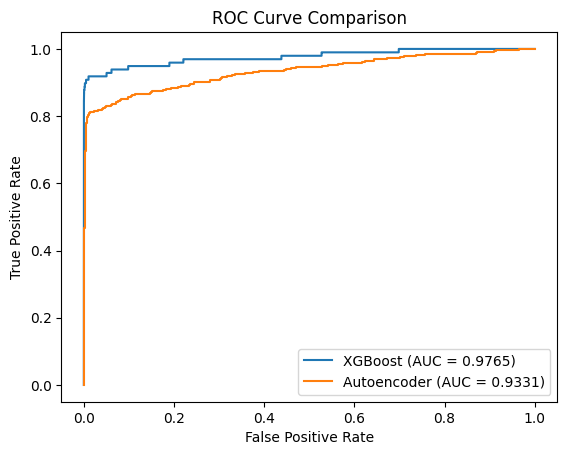

In [49]:
# 🔹 Step 49: Code block



# Preprocess data
X = df.drop('Class', axis=1)
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (full dataset for supervised XGBoost)
train_data, test_data, train_labels, test_labels = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# XGBoost Grid Search
param_grid = {
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'scale_pos_weight': [10, (len(y[y==0])/len(y[y==1]))**0.5, 50]
}
model_xgb = XGBClassifier(random_state=42, device='cuda')
grid = GridSearchCV(model_xgb, param_grid, scoring='f1', cv=3, n_jobs=1)
grid.fit(train_data, train_labels)
print(f"Best XGBoost parameters: {grid.best_params_}")
model_xgb = grid.best_estimator_

# Evaluate XGBoost
test_probs = model_xgb.predict_proba(test_data)[:, 1]
test_preds = model_xgb.predict(test_data)
auc_xgb = roc_auc_score(test_labels, test_probs)
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(test_labels, test_preds, average='binary')
print(f"XGBoost - AUC-ROC: {auc_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1: {f1_xgb:.4f}")

# Autoencoder for comparison
normal = df[df['Class'] == 0].drop('Class', axis=1)
fraud = df[df['Class'] == 1].drop('Class', axis=1)
normal_scaled = scaler.fit_transform(normal)
train_data_ae, test_normal = train_test_split(normal_scaled, test_size=0.2, random_state=42)
test_fraud = scaler.transform(fraud)
test_data_ae = np.concatenate([test_normal, test_fraud])
test_labels_ae = np.concatenate([np.zeros(len(test_normal)), np.ones(len(test_fraud))])
train_tensor = torch.FloatTensor(train_data_ae).to(device)
train_dataset = TensorDataset(train_tensor, train_tensor)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_tensor = torch.FloatTensor(test_data_ae).to(device)

class Autoencoder(nn.Module):
    def __init__(self, input_dim=30, latent_dim=10):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 20), nn.ReLU(),
            nn.Linear(20, latent_dim), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 20), nn.ReLU(),
            nn.Linear(20, input_dim)
        )
    def forward(self, x):
        return self.decoder(self.encoder(x))

model_ae = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_ae.parameters(), lr=0.001)

# Train autoencoder
model_ae.train()
for epoch in range(50):
    total_loss = 0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/50'):
        inputs = batch[0].to(device)
        outputs = model_ae(inputs)
        loss = criterion(outputs, inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.6f}')

# Evaluate autoencoder
model_ae.eval()
with torch.no_grad():
    recon = model_ae(test_tensor)
    recon_error = torch.mean((recon - test_tensor) ** 2, dim=1).cpu().numpy()
threshold = np.quantile(recon_error[:len(test_normal)], 0.95)
predictions_ae = (recon_error > threshold).astype(int)
auc_ae = roc_auc_score(test_labels_ae, recon_error)
precision_ae, recall_ae, f1_ae, _ = precision_recall_fscore_support(test_labels_ae, predictions_ae, average='binary')
print(f"Autoencoder - AUC-ROC: {auc_ae:.4f}, Precision: {precision_ae:.4f}, Recall: {recall_ae:.4f}, F1: {f1_ae:.4f}")

# Plot ROC Curves
fpr_xgb, tpr_xgb, _ = roc_curve(test_labels, test_probs)
fpr_ae, tpr_ae, _ = roc_curve(test_labels_ae, recon_error)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})')
plt.plot(fpr_ae, tpr_ae, label=f'Autoencoder (AUC = {auc_ae:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [50]:
# 🔹 Step 50: Code block
threshold = 0.3  # Lower for higher recall
test_preds = (test_probs > threshold).astype(int)
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(test_labels, test_preds, average='binary')
print(f"XGBoost (threshold=0.3) - Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1: {f1_xgb:.4f}")

XGBoost (threshold=0.3) - Precision: 0.8632, Recall: 0.8367, F1: 0.8497


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda
Best XGBoost parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 24.039051900192792}
XGBoost (threshold=0.3) - AUC-ROC: 0.9765, Precision: 0.8632, Recall: 0.8367, F1: 0.8497


Epoch 1/50: 100%|██████████| 889/889 [00:03<00:00, 236.60it/s]


Epoch 1, Loss: 0.823724
Epoch 1, Validation Loss: 0.702639


Epoch 2/50: 100%|██████████| 889/889 [00:03<00:00, 229.79it/s]


Epoch 2, Loss: 0.719647
Epoch 2, Validation Loss: 0.631349


Epoch 3/50: 100%|██████████| 889/889 [00:04<00:00, 187.47it/s]


Epoch 3, Loss: 0.668789
Epoch 3, Validation Loss: 0.576217


Epoch 4/50: 100%|██████████| 889/889 [00:04<00:00, 187.93it/s]


Epoch 4, Loss: 0.632391
Epoch 4, Validation Loss: 0.543341


Epoch 5/50: 100%|██████████| 889/889 [00:03<00:00, 225.74it/s]


Epoch 5, Loss: 0.613638
Epoch 5, Validation Loss: 0.514605


Epoch 6/50: 100%|██████████| 889/889 [00:04<00:00, 193.51it/s]


Epoch 6, Loss: 0.592994
Epoch 6, Validation Loss: 0.510959


Epoch 7/50: 100%|██████████| 889/889 [00:03<00:00, 231.79it/s]


Epoch 7, Loss: 0.582287
Epoch 7, Validation Loss: 0.483148


Epoch 8/50: 100%|██████████| 889/889 [00:03<00:00, 240.06it/s]


Epoch 8, Loss: 0.573605
Epoch 8, Validation Loss: 0.481701


Epoch 9/50: 100%|██████████| 889/889 [00:04<00:00, 185.78it/s]


Epoch 9, Loss: 0.567570
Epoch 9, Validation Loss: 0.476373


Epoch 10/50: 100%|██████████| 889/889 [00:03<00:00, 239.18it/s]


Epoch 10, Loss: 0.563273
Epoch 10, Validation Loss: 0.494673


Epoch 11/50: 100%|██████████| 889/889 [00:03<00:00, 227.86it/s]


Epoch 11, Loss: 0.559259
Epoch 11, Validation Loss: 0.471878


Epoch 12/50: 100%|██████████| 889/889 [00:04<00:00, 191.19it/s]


Epoch 12, Loss: 0.555261
Epoch 12, Validation Loss: 0.464980


Epoch 13/50: 100%|██████████| 889/889 [00:03<00:00, 224.51it/s]


Epoch 13, Loss: 0.553668
Epoch 13, Validation Loss: 0.461367


Epoch 14/50: 100%|██████████| 889/889 [00:03<00:00, 238.78it/s]


Epoch 14, Loss: 0.553776
Epoch 14, Validation Loss: 0.460195


Epoch 15/50: 100%|██████████| 889/889 [00:04<00:00, 199.09it/s]


Epoch 15, Loss: 0.550586
Epoch 15, Validation Loss: 0.459711


Epoch 16/50: 100%|██████████| 889/889 [00:04<00:00, 220.58it/s]


Epoch 16, Loss: 0.552178
Epoch 16, Validation Loss: 0.458594


Epoch 17/50: 100%|██████████| 889/889 [00:03<00:00, 225.61it/s]


Epoch 17, Loss: 0.547939
Epoch 17, Validation Loss: 0.459842


Epoch 18/50: 100%|██████████| 889/889 [00:03<00:00, 223.88it/s]


Epoch 18, Loss: 0.546285
Epoch 18, Validation Loss: 0.454718


Epoch 19/50: 100%|██████████| 889/889 [00:04<00:00, 195.52it/s]


Epoch 19, Loss: 0.546081
Epoch 19, Validation Loss: 0.451051


Epoch 20/50: 100%|██████████| 889/889 [00:03<00:00, 237.19it/s]


Epoch 20, Loss: 0.543314
Epoch 20, Validation Loss: 0.447897


Epoch 21/50: 100%|██████████| 889/889 [00:03<00:00, 228.21it/s]


Epoch 21, Loss: 0.538700
Epoch 21, Validation Loss: 0.450411


Epoch 22/50: 100%|██████████| 889/889 [00:04<00:00, 191.38it/s]


Epoch 22, Loss: 0.538927
Epoch 22, Validation Loss: 0.449159


Epoch 23/50: 100%|██████████| 889/889 [00:03<00:00, 228.43it/s]


Epoch 23, Loss: 0.539527
Epoch 23, Validation Loss: 0.448722


Epoch 24/50: 100%|██████████| 889/889 [00:03<00:00, 241.10it/s]


Epoch 24, Loss: 0.536567
Epoch 24, Validation Loss: 0.443580


Epoch 25/50: 100%|██████████| 889/889 [00:04<00:00, 184.50it/s]


Epoch 25, Loss: 0.536486
Epoch 25, Validation Loss: 0.443285


Epoch 26/50: 100%|██████████| 889/889 [00:03<00:00, 240.51it/s]


Epoch 26, Loss: 0.536259
Epoch 26, Validation Loss: 0.443969


Epoch 27/50: 100%|██████████| 889/889 [00:03<00:00, 228.33it/s]


Epoch 27, Loss: 0.532637
Epoch 27, Validation Loss: 0.438974


Epoch 28/50: 100%|██████████| 889/889 [00:04<00:00, 185.18it/s]


Epoch 28, Loss: 0.535633
Epoch 28, Validation Loss: 0.437858


Epoch 29/50: 100%|██████████| 889/889 [00:03<00:00, 238.73it/s]


Epoch 29, Loss: 0.532693
Epoch 29, Validation Loss: 0.441680


Epoch 30/50: 100%|██████████| 889/889 [00:03<00:00, 230.43it/s]


Epoch 30, Loss: 0.532030
Epoch 30, Validation Loss: 0.442168


Epoch 31/50: 100%|██████████| 889/889 [00:04<00:00, 211.36it/s]


Epoch 31, Loss: 0.530207
Epoch 31, Validation Loss: 0.437530


Epoch 32/50: 100%|██████████| 889/889 [00:04<00:00, 207.84it/s]


Epoch 32, Loss: 0.529870
Epoch 32, Validation Loss: 0.438269


Epoch 33/50: 100%|██████████| 889/889 [00:03<00:00, 237.43it/s]


Epoch 33, Loss: 0.528859
Epoch 33, Validation Loss: 0.440502


Epoch 34/50: 100%|██████████| 889/889 [00:04<00:00, 214.87it/s]


Epoch 34, Loss: 0.527632
Epoch 34, Validation Loss: 0.438129


Epoch 35/50: 100%|██████████| 889/889 [00:04<00:00, 201.44it/s]


Epoch 35, Loss: 0.529525
Epoch 35, Validation Loss: 0.434858


Epoch 36/50: 100%|██████████| 889/889 [00:03<00:00, 228.95it/s]


Epoch 36, Loss: 0.526793
Epoch 36, Validation Loss: 0.433000


Epoch 37/50: 100%|██████████| 889/889 [00:03<00:00, 238.44it/s]


Epoch 37, Loss: 0.528117
Epoch 37, Validation Loss: 0.433527


Epoch 38/50: 100%|██████████| 889/889 [00:04<00:00, 187.68it/s]


Epoch 38, Loss: 0.528627
Epoch 38, Validation Loss: 0.431285


Epoch 39/50: 100%|██████████| 889/889 [00:03<00:00, 239.47it/s]


Epoch 39, Loss: 0.526367
Epoch 39, Validation Loss: 0.433190


Epoch 40/50: 100%|██████████| 889/889 [00:03<00:00, 230.10it/s]


Epoch 40, Loss: 0.526457
Epoch 40, Validation Loss: 0.431583


Epoch 41/50: 100%|██████████| 889/889 [00:04<00:00, 190.69it/s]


Epoch 41, Loss: 0.526121
Epoch 41, Validation Loss: 0.431999


Epoch 42/50: 100%|██████████| 889/889 [00:03<00:00, 232.93it/s]


Epoch 42, Loss: 0.526218
Epoch 42, Validation Loss: 0.431211


Epoch 43/50: 100%|██████████| 889/889 [00:03<00:00, 235.49it/s]


Epoch 43, Loss: 0.526603
Epoch 43, Validation Loss: 0.432448


Epoch 44/50: 100%|██████████| 889/889 [00:04<00:00, 192.56it/s]


Epoch 44, Loss: 0.526959
Epoch 44, Validation Loss: 0.432661


Epoch 45/50: 100%|██████████| 889/889 [00:03<00:00, 232.94it/s]


Epoch 45, Loss: 0.525606
Epoch 45, Validation Loss: 0.433574


Epoch 46/50: 100%|██████████| 889/889 [00:03<00:00, 225.78it/s]


Epoch 46, Loss: 0.525838
Epoch 46, Validation Loss: 0.432566


Epoch 47/50: 100%|██████████| 889/889 [00:04<00:00, 216.21it/s]


Epoch 47, Loss: 0.526084
Epoch 47, Validation Loss: 0.432502
Early stopping at epoch 47
Autoencoder (quantile=0.95) - AUC-ROC: 0.9494, Precision: 0.1289, Recall: 0.8557, F1: 0.2241
Autoencoder (quantile=0.99) - AUC-ROC: 0.9494, Precision: 0.4128, Recall: 0.8130, F1: 0.5476
Autoencoder (quantile=0.999) - AUC-ROC: 0.9494, Precision: 0.8314, Recall: 0.5711, F1: 0.6771


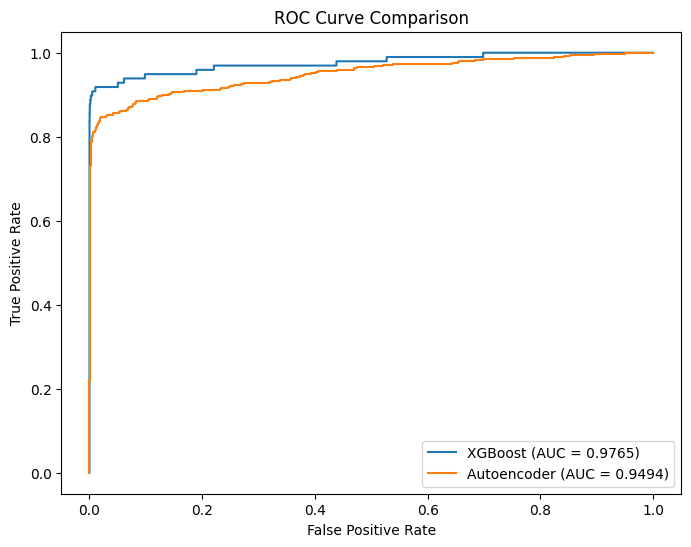

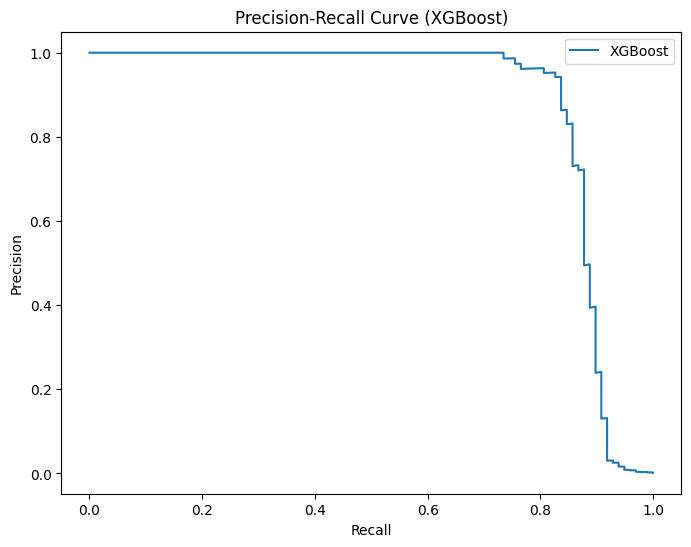

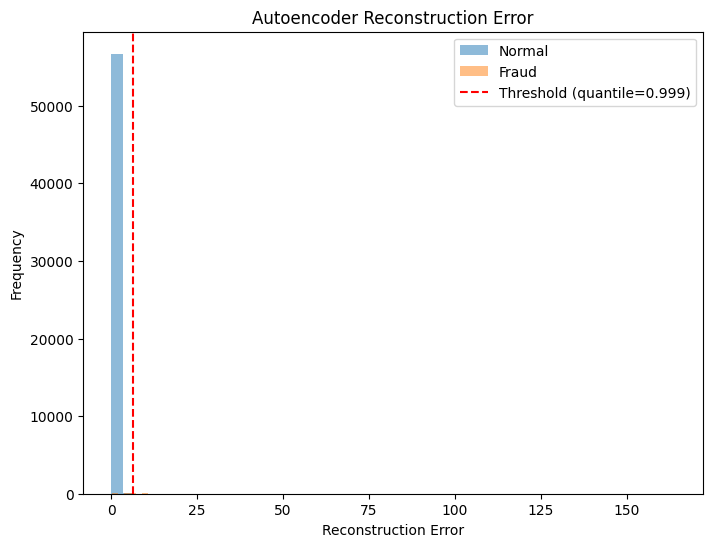

In [53]:
# 🔹 Step 51: Code block
# Install dependencies
!pip install xgboost scikit-learn pandas numpy matplotlib tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from tqdm import tqdm

# Mount Google Drive (optional)
from google.colab import drive
drive.mount('/content/drive')

try:df = pd.read_csv('/content/drive/My Drive/creditcard.csv')  # Update path if needed
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Upload to Colab or update path.")
    raise

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')


X = df.drop('Class', axis=1)
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
train_data, test_data, train_labels, test_labels = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# XGBoost Grid Search
param_grid = {
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'scale_pos_weight': [10, (len(y[y==0])/len(y[y==1]))**0.5, 50]
}
model_xgb = XGBClassifier(random_state=42, device='cuda')
grid = GridSearchCV(model_xgb, param_grid, scoring='f1', cv=3, n_jobs=1)
grid.fit(train_data, train_labels)
print(f"Best XGBoost parameters: {grid.best_params_}")
model_xgb = grid.best_estimator_

# Evaluate XGBoost (threshold=0.3)
test_probs = model_xgb.predict_proba(test_data)[:, 1]
threshold_xgb = 0.3
test_preds = (test_probs > threshold_xgb).astype(int)
auc_xgb = roc_auc_score(test_labels, test_probs)
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(test_labels, test_preds, average='binary')
print(f"XGBoost (threshold={threshold_xgb}) - AUC-ROC: {auc_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1: {f1_xgb:.4f}")

# Autoencoder
normal = df[df['Class'] == 0].drop('Class', axis=1)
fraud = df[df['Class'] == 1].drop('Class', axis=1)
normal_scaled = scaler.fit_transform(normal)
train_data_ae, test_normal = train_test_split(normal_scaled, test_size=0.2, random_state=42)
test_fraud = scaler.transform(fraud)
test_data_ae = np.concatenate([test_normal, test_fraud])
test_labels_ae = np.concatenate([np.zeros(len(test_normal)), np.ones(len(test_fraud))])
train_tensor = torch.FloatTensor(train_data_ae).to(device)
train_dataset = TensorDataset(train_tensor, train_tensor)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_tensor = torch.FloatTensor(test_data_ae).to(device)

# Validation split for early stopping
val_data_ae, test_normal_final = train_test_split(test_normal, test_size=0.5, random_state=42)
val_tensor = torch.FloatTensor(val_data_ae).to(device)

class Autoencoder(nn.Module):
    def __init__(self, input_dim=30, latent_dim=20):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 24), nn.ReLU(), nn.Dropout(0.4),
            nn.Linear(24, 16), nn.ReLU(),
            nn.Linear(16, latent_dim), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 16), nn.ReLU(),
            nn.Linear(16, 24), nn.ReLU(),
            nn.Linear(24, input_dim)
        )
    def forward(self, x):
        return self.decoder(self.encoder(x))

model_ae = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_ae.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# Train denoising autoencoder with early stopping
model_ae.train()
best_val_loss = float('inf')
patience = 5
counter = 0
for epoch in range(50):
    total_loss = 0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/50'):
        inputs = batch[0].to(device)
        inputs_noisy = inputs + torch.normal(0, 0.3, size=inputs.shape).to(device)
        outputs = model_ae(inputs_noisy)
        loss = criterion(outputs, inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}, Loss: {avg_loss:.6f}')

    # Validation loss
    model_ae.eval()
    with torch.no_grad():
        val_outputs = model_ae(val_tensor)
        val_loss = criterion(val_outputs, val_tensor).item()
    print(f'Epoch {epoch+1}, Validation Loss: {val_loss:.6f}')
    model_ae.train()

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model_ae.state_dict(), '/content/drive/MyDrive/autoencoder_best.pth')
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
    scheduler.step()

# Load best model
model_ae.load_state_dict(torch.load('/content/drive/MyDrive/autoencoder_best.pth'))

# Evaluate autoencoder (multiple thresholds)
model_ae.eval()
with torch.no_grad():
    recon = model_ae(test_tensor)
    recon_error = torch.mean((recon - test_tensor) ** 2, dim=1).cpu().numpy()
for quantile in [0.95, 0.99, 0.999]:
    threshold_ae = np.quantile(recon_error[:len(test_normal)], quantile)
    predictions_ae = (recon_error > threshold_ae).astype(int)
    auc_ae = roc_auc_score(test_labels_ae, recon_error)
    precision_ae, recall_ae, f1_ae, _ = precision_recall_fscore_support(test_labels_ae, predictions_ae, average='binary')
    print(f"Autoencoder (quantile={quantile}) - AUC-ROC: {auc_ae:.4f}, Precision: {precision_ae:.4f}, Recall: {recall_ae:.4f}, F1: {f1_ae:.4f}")

# Visualizations
# 1. ROC Curve
plt.figure(figsize=(8, 6))
fpr_xgb, tpr_xgb, _ = roc_curve(test_labels, test_probs)
fpr_ae, tpr_ae, _ = roc_curve(test_labels_ae, recon_error)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})')
plt.plot(fpr_ae, tpr_ae, label=f'Autoencoder (AUC = {auc_ae:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# 2. Precision-Recall Curve (XGBoost)
plt.figure(figsize=(8, 6))
precision_xgb_pr, recall_xgb_pr, _ = precision_recall_curve(test_labels, test_probs)
plt.plot(recall_xgb_pr, precision_xgb_pr, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.legend()
plt.show()

# 3. Reconstruction Error Histogram
plt.figure(figsize=(8, 6))
plt.hist(recon_error[:len(test_normal)], bins=50, alpha=0.5, label='Normal')
plt.hist(recon_error[len(test_normal):], bins=50, alpha=0.5, label='Fraud')
plt.axvline(threshold_ae, color='r', linestyle='--', label=f'Threshold (quantile={quantile})')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Autoencoder Reconstruction Error')
plt.legend()
plt.show()



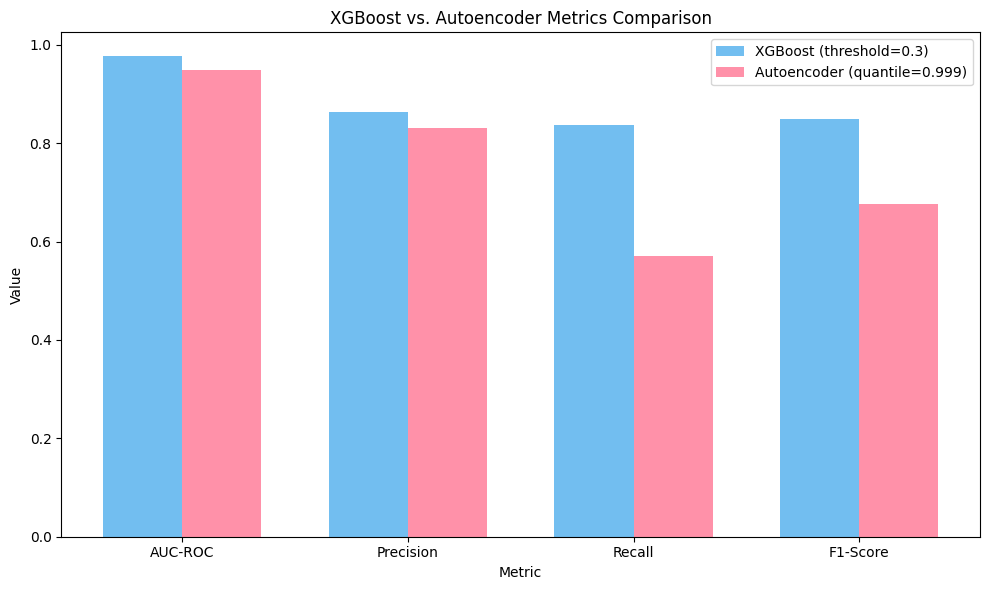

In [54]:
# 🔹 Step 52: Code block
plt.figure(figsize=(10, 6))
metrics = ['AUC-ROC', 'Precision', 'Recall', 'F1-Score']
xgb_metrics = [auc_xgb, precision_xgb, recall_xgb, f1_xgb]
ae_metrics = [auc_ae, precision_ae, recall_ae, f1_ae]
bar_width = 0.35
index = np.arange(len(metrics))
plt.bar(index, xgb_metrics, bar_width, label='XGBoost (threshold=0.3)', color=(0.21, 0.64, 0.92, 0.7))
plt.bar(index + bar_width, ae_metrics, bar_width, label='Autoencoder (quantile=0.999)', color=(1.0, 0.39, 0.52, 0.7))
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('XGBoost vs. Autoencoder Metrics Comparison')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 🔹 Step 53: Code block
model_xgb.save_model('/content/drive/MyDrive/xgboost_fraud.json')
torch.save(model_ae.state_dict(), '/content/drive/MyDrive/autoencoder_fraud.pth')

In [ ]:
# 🔹 Step 54: Code block
